# Identify:

Please fill-in your ID in the following cell, **only id numbers, no names!**


<div style="direction:rtl"> 
מלאו בתא הבא את מספר הת.ז שלכם. רק מספר ת.ז., ללא שמות!!  
</div>

In [1]:
id1 = "204762124"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [3]:
df = pd.DataFrame([id1])

In [4]:
df.to_clipboard(index=False,header=False)

---

----

In [5]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/hotel_bookings.csv'
data = pd.read_csv(url)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
data.dtypes


hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [7]:
pip install -U seaborn

Requirement already up-to-date: seaborn in c:\programdata\anaconda3\lib\site-packages (0.11.1)
Note: you may need to restart the kernel to use updated packages.


# Q1 

In [8]:
data.pivot_table('adults',index = 'arrival_date_year',columns = 'customer_type')

customer_type,Contract,Group,Transient,Transient-Party
arrival_date_year,,,,
2015,1.899925,3.744792,1.831336,1.757485
2016,1.951058,1.616766,1.882386,1.725445
2017,1.962236,1.674312,1.911337,1.688830


 # Q2

I tried to do sns.displot or histplot but that didnt work here, even after i updated seaborn.

<Figure size 576x288 with 0 Axes>

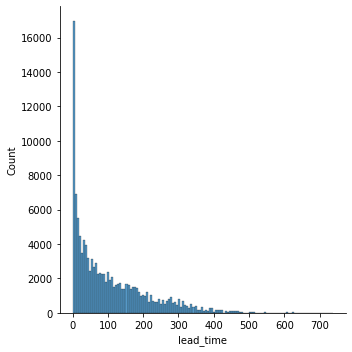

lead time is from 0  to  737


In [25]:
plt.figure(figsize=(8,4))
sns.displot(data['lead_time'])
plt.show()
print('lead time is from', data['lead_time'].min(), ' to ', data['lead_time'].max())

# Q3

In [10]:
 pd.crosstab(data['hotel'], data['customer_type'])

customer_type,Contract,Group,Transient,Transient-Party
hotel,,,,
City Hotel,2300,293,59404,17333
Resort Hotel,1776,284,30209,7791


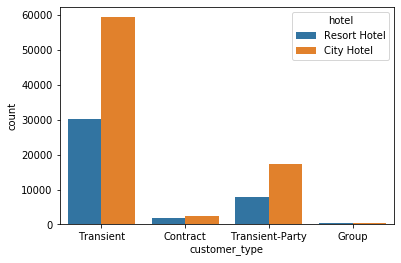

In [11]:
sns.countplot(x="customer_type", data=data,hue = 'hotel') 

# Q4

In [12]:
plus3 = data[data['adults'] >3]
canceled = plus3[['is_canceled','adults']]
count_row = canceled.shape[0]
print('number of rows: ',count_row)
canceled.head(5)

number of rows:  78


,is_canceled,adults
125,0,4
354,0,4
1023,1,4
1539,1,40
1587,1,26


# Q5

In [13]:
features = ['stays_in_week_nights', 'stays_in_weekend_nights','customer_type', 'previous_cancellations', 'booking_changes',
            'babies', 'is_repeated_guest','previous_bookings_not_canceled','days_in_waiting_list', 'lead_time', 'is_canceled' ]

lets see if there is normal distribution


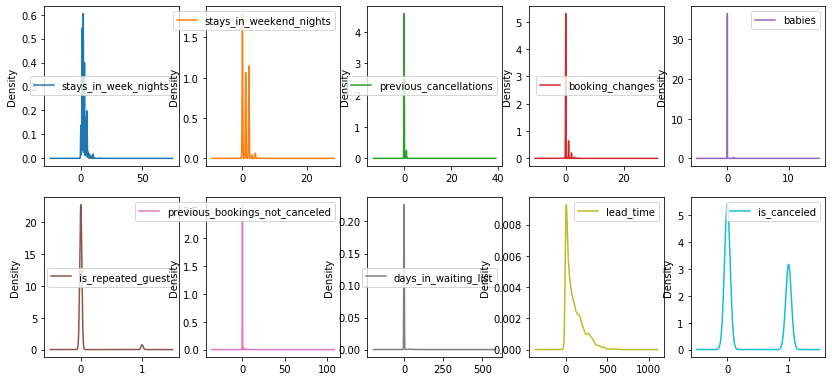

In [14]:
data[features].plot.density(subplots=True, sharex=False, sharey=False, layout=(5,5), figsize=(14,17))
print('lets see if there is normal distribution')

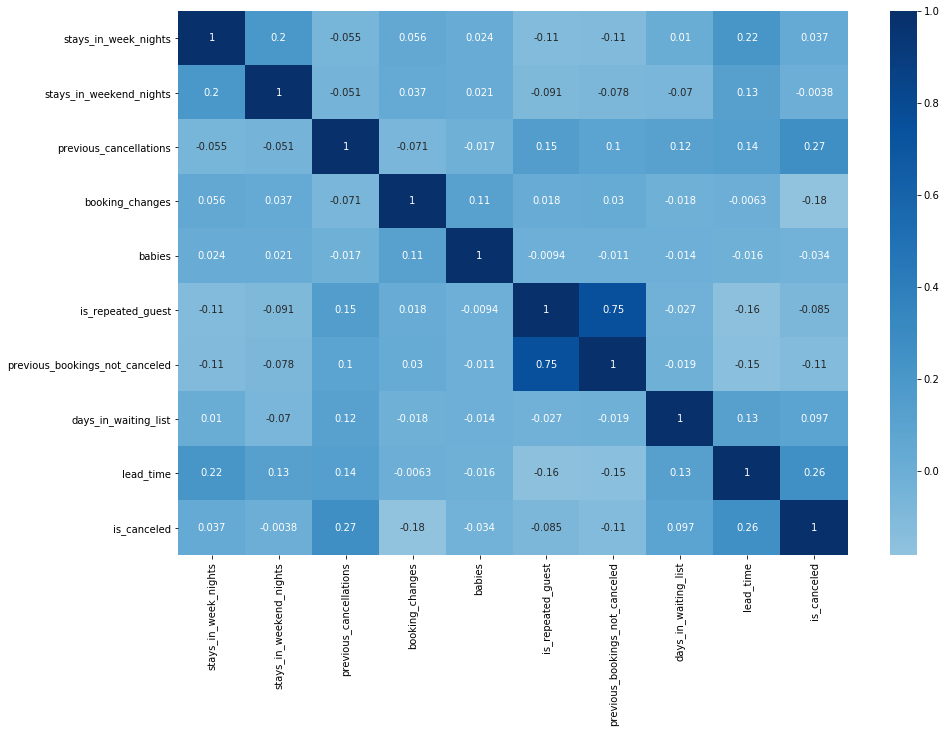

In [15]:
corrs = data[features].corr(method = 'kendall')
plt.figure(figsize=(15,10))  #figure size
sns.heatmap(corrs,  cmap='Blues', center =0, annot = True)

for the scatterplot:

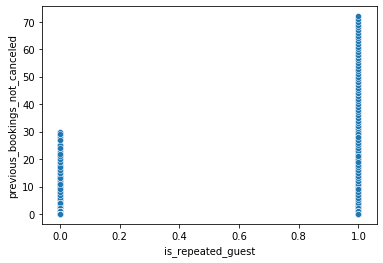

In [16]:
sns.scatterplot(data=data[features], y = 'previous_bookings_not_canceled', x = 'is_repeated_guest')

# Q6

In [17]:
features1 = ['stays_in_week_nights', 'stays_in_weekend_nights', 'previous_cancellations', 'booking_changes',
            'babies', 'is_repeated_guest','previous_bookings_not_canceled','days_in_waiting_list', 'lead_time']

In [18]:
x = data[features1] 
y = data['is_canceled'] 
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size=0.25, random_state=0) 

In [19]:
dt = sk.tree.DecisionTreeClassifier(random_state=8) 
dt.fit(x_train, y_train) 
pred = dt.predict(x_test) 
acc = sk.metrics.accuracy_score(pred, y_test)
acc

0.7580407397480569

In [27]:
print(sk.metrics.classification_report(y_test, acc, target_names=model2.classes_))

NameError: name 'model2' is not defined

אני לא כלכך בטוח מה זה דיוק מקרי, גם ניסיתי לתרגם לאנגלי, אם זה precision אז לא הספקתי למצא איך מואים את זה, 

אני מניח פחות טוב

---
# GOOD LUCK !!!!
---

In [28]:
# do not type below this line